<a href="https://colab.research.google.com/github/youngcheolman/practice/blob/main/%EA%B3%A0%EA%B0%9D_%EC%97%AC%EC%A0%95%EB%B3%84_%EA%B0%80%EC%84%A4_%EC%84%A4%EC%A0%95_%ED%9B%84_%EC%88%98%EA%B0%95_%EC%99%84%EC%A3%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####- ***주요 문제점*** :

8월 중순부터 영상 수강 완주율이 크게 떨어졌다. 이유를 데이터를 바탕으로 분석하여 이유를 개선하라





####- ***현재 상황 살펴보기***

1. 스파르타코딩클럽 광고의 메인 타겟은 2-30대

2. 2-30대의 구매 건수는 다른 나이대에 비해 높은 편

3. 이번에 완주 후 퀴즈를 제출하는 이벤트에서 2-30대의 참여율이 저조

4. 퀴즈에 참여하지 않은 인원의 전화인터뷰에서 “바빠서”라는 답변이 압도적으로 많았음

####- ***의문점*** :


시간이 없어 듣지 못하는 고객의 경우 우리가 무언가를 개선한다고 완주를 할 수 없습니다.

애초에 만족할 수 없는 고객에게 판매를 한 것이니 장기적 관점에서 포지셔닝 변경이 필요하다고 생각한다

그렇다면 우리가 설정한 2-30대 타겟이 정말로 시간이 없는가? 그렇다면 우리가 설정한 타겟이 잘못되었는가?에 대한 의문점 부터 풀어가보자

####- ***고객 여정을 살펴보며 데이터 분석 가설 설정***

1. 강의를 들을 수 있는 시간적 여유가 생긴다.

2. 강의를 들어야겠다고 마음을 먹는다.

3. 강의를 듣기 위해 콘텐츠에 접근한다.




####- **첫번째 가설** :

다른 연령대에 비해 바쁜 20~30대의 수강 완주율이 상대적으로 낮을 것이다.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

In [44]:
df = pd.read_csv('sprata_data.csv')
df

,_id,created_at,updated_at,name,marketing,managed,gender,age,progress_rate
0,e88cbf158991b41c,2022-08-26 10:04:54,2022-10-07 8:35:47,온아린,False,True,male,10,100.00
1,34525c4c113ea233,2021-02-20 1:23:38,2022-08-08 22:04:00,유강민,False,False,female,40,63.64
2,8f869d1ce7289b3d,2021-02-20 1:23:38,2022-08-08 22:04:00,문민서,False,False,female,30,63.64
3,bf1e94f981743e8d,2022-07-22 15:59:44,2022-08-29 21:12:15,석준영,False,False,male,50,64.77
4,b281c6fc121a338c,2022-07-22 15:59:44,2022-08-29 21:12:15,석도현,False,False,male,20,64.77
...,...,...,...,...,...,...,...,...,...
2569,17cb6b9a82c3551f,2022-06-29 19:15:40,2022-07-28 16:17:12,설현우,True,True,male,40,0.00
2570,567b4a345638d73c,2022-03-09 11:19:45,2022-07-25 9:49:32,최도훈,True,True,female,10,0.00
2571,448eacf2512feca9,2022-08-06 10:38:01,2022-08-22 18:40:04,신지완,True,True,female,30,0.00
2572,4cfec575328d88a2,2022-08-06 10:38:01,2022-08-22 18:40:04,곽소희,True,True,female,30,0.00


In [45]:
# 연령별 수강률 합
progress_rate_by_age = df.groupby('age')['progress_rate'].sum()
print(progress_rate_by_age)

#연령별 수강인원
number_of_people_by_age = df.groupby('age')['_id'].count()
print(number_of_people_by_age)

#연령별 평균 수강율
average_progress_rate = progress_rate_by_age/number_of_people_by_age
print(average_progress_rate)

age
10    14446.05
20    74306.47
30    56793.87
40    15921.31
50    13001.36
Name: progress_rate, dtype: float64
age
10     226
20    1043
30     835
40     240
50     230
Name: _id, dtype: int64
age
10    63.920575
20    71.243020
30    68.016611
40    66.338792
50    56.527652
dtype: float64


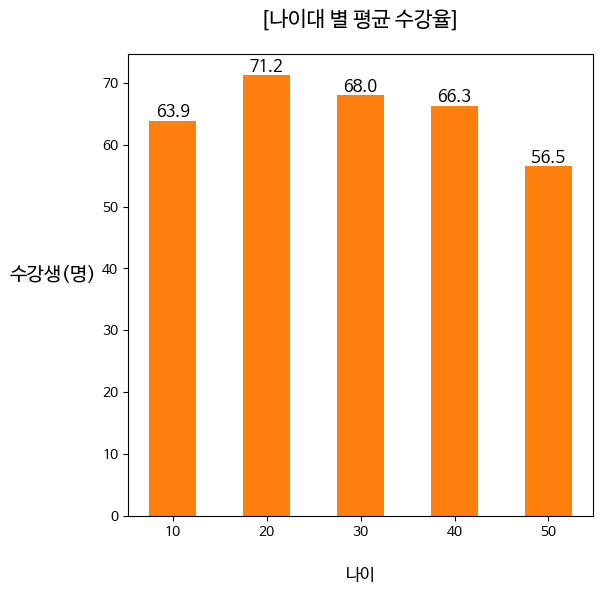

In [46]:
plt.figure(figsize=(6,6))

#그래프의 x축 눈금 설정
plt.xticks([10,20,30,40,50])

#plt.bar(X축값, Y축값)
plt.bar(average_progress_rate.index, average_progress_rate)

bar = plt.bar(average_progress_rate.index, average_progress_rate, width=5)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


#그래프의 제목
#타이틀과 그래프와의 간격은 pad= 수치 로 나타내어요!
plt.title('[나이대 별 평균 수강율]',fontsize=15,pad=20)

#그래프의 x축 라벨 이름
#labelpad 파라미터는 축 레이블의 여백을 지정합니다.
plt.xlabel('나이',fontsize=12,labelpad=20)

#그래프의 y축 라벨 이름
plt.ylabel('수강생(명)',fontsize=14,rotation=360,labelpad=35)

#그래프를 화면에 나타나도록 합니다.
plt.show()

##- 간략 보고서

위의 그래프를 통해 나이대별 수강 완주율을 살펴보았는데 20대와 30대가 가장 높은 평균 수강율을 보이고 있다

따라서 기존의 "다른 연령대에 비해 바쁜 20~30대의 수강 완주율이 상대적으로 낮을 것이다."라는 가설은 기각이 된다

2-30대가 실제로 완주율이 낮지 않음을 확인하였고,프로덕트를 개선하거나 광고 메인 타겟을 변경하지 않아도 괜찮을꺼 같다

####- ***고객 여정을 살펴보며 데이터 분석 가설 설정***

2. 강의를 들어야겠다고 마음을 먹는다.

3. 강의를 듣기 위해 콘텐츠에 접근한다.



이번엔 두번째 고객 여정 중 강의를 들어야겠다고 마음을 먹었을때 강의가 마음에 들도록 동기부여 하는 파트를 생각해보자

####***현재 상황 살펴보기***

최근 3개월간 찐한관리 신청 비율과 완주율이 모두 감소하고 있다

고객 완주율 개선을 위한 동기부여 관련한 부분에서 3개월간 찐한 관리 신청 비율과 완주율이 모두 감소한 점을 보면 찐한 관리를 받지 못한 인원이 많아 완주율이 꺾인 것이 아닐지 의심이 되었다

그래서 찐한 관리 서비스가 완주에 효과가 있는지 데이터를 살펴보았다

기존 고객 관리 서비스 "찐한 관리"가 정말로 수강 완주율에 영향이 있는 것인가?

###***두번째 가설***

찐한 관리를 받은 받은 인원이 그렇지 않은 인원보다 완주율이 높을 것이다

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

In [48]:
df = pd.read_csv('sprata_data.csv')
df.head()

,_id,created_at,updated_at,name,marketing,managed,gender,age,progress_rate
0,e88cbf158991b41c,2022-08-26 10:04:54,2022-10-07 8:35:47,온아린,False,True,male,10,100.00
1,34525c4c113ea233,2021-02-20 1:23:38,2022-08-08 22:04:00,유강민,False,False,female,40,63.64
2,8f869d1ce7289b3d,2021-02-20 1:23:38,2022-08-08 22:04:00,문민서,False,False,female,30,63.64
3,bf1e94f981743e8d,2022-07-22 15:59:44,2022-08-29 21:12:15,석준영,False,False,male,50,64.77
4,b281c6fc121a338c,2022-07-22 15:59:44,2022-08-29 21:12:15,석도현,False,False,male,20,64.77


In [49]:
#managed가 True인 사람과 False인 사람을 비교하기
managed = ['TRUE','FALSE']
managed

['TRUE', 'FALSE']

In [50]:
#관리 여부에 따라, 수강완료율 평균 구하기
managed_data_avg = df.groupby('managed')['progress_rate'].sum()/df.groupby('managed')['_id'].count()
managed_data_avg

,0
managed,
False,38.587119
True,68.466171


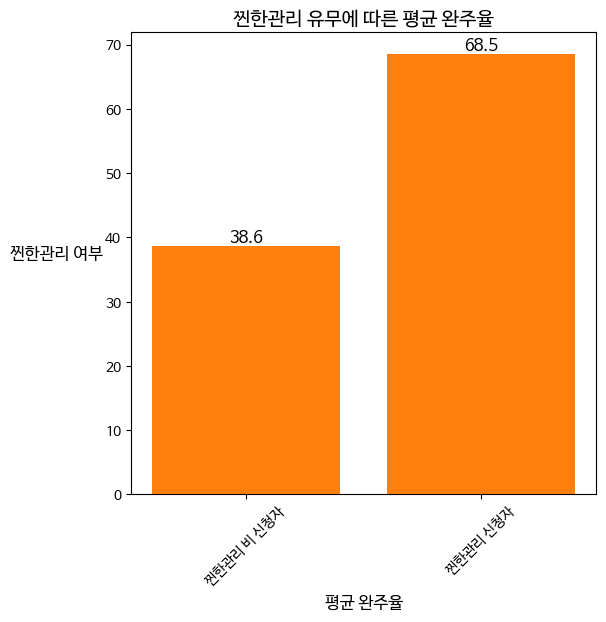

In [51]:
plt.figure(figsize=(6,6))


#각각 어떤 값이 들어가야 하는지 입력해 볼까요?
#plt.bar(X축값, Y축값)
plt.bar(managed_data_avg.index ,managed_data_avg)

#그래프의 바에 각 수치율을 추가 해 볼까요?
bar = plt.bar(managed_data_avg.index ,managed_data_avg)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


#그래프의 제목
plt.title('찐한관리 유무에 따른 평균 완주율',fontsize=14)
#그래프의 x축 라벨 이름
plt.xlabel('평균 완주율',fontsize=12)
#x축 눈금 레이블 지정하기
#기존의 0,1이라는 x축 레이블을, labels =["..."]로 변경 가능 합니다 :)
plt.xticks([0,1], labels=["찐한관리 비 신청자","찐한관리 신청자"])
#그래프의 y축 라벨 이름
plt.ylabel('찐한관리 여부',fontsize=12,rotation=360,labelpad=35)
#x축 눈금의 글씨를 45도 회전
plt.xticks(rotation=45)
#y축 눈금의 글씨를 360도 회전
plt.yticks(rotation=360)
#그래프를 화면에 나타나도록 합니다.
plt.show()

"찐한 관리”를 받는 인원과 받지 않는 인원을 나누어서 각 그룹별 완주율의 평균을 비교했는데 찐한 관리를 받지 않은 그룹의 수강 완주율은 '38.6%' 찐한 관리를 받은 그룹의 수강 완주율은 '68.5%'로 찐한관리를 받은 그룹의 완주율이 월등히 높은 것을 확인할 수 있었습니다.

실제로 찐한관리 신청 비율을 높이는 액션을 진행해보는 것이 완주율 개선에 효과적일 것 같다
수업 시작 전, 찐한관리 참여를 적극적으로 유도해보아도 좋을 것 같다

##- ***고객 여정을 살펴보며 데이터 분석 가설 설정***

3. 강의를 듣기 위해 콘텐츠에 접근한다.


우리가 제공하는 컨텐츠가 재미가 있고 실제로 프로젝트 개선이 도움이 되었는지에 대한 가설 세우고 확인하기

## - ***가설 정의***

8월 둘째주 부터 변경된 3주차 강의의 완주율이 현저히 떨어졌을 것이다.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

In [53]:
df = pd.read_csv('cohort_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     1736 non-null   object
 1   user_id        1736 non-null   object
 2   name           1736 non-null   object
 3   progress_rate  1736 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 54.4+ KB


,created_at,user_id,name,progress_rate
0,2022. 8. 15,237a15a4c854a19f,이시우,100
1,2022. 8. 8,9e39ebcdb3e41fdb,경서희,100
2,2022. 8. 8,ccd9564adf22a5f7,지소희,36
3,2022. 8. 1,291ad78f3adfa9ee,최가은,100
4,2022. 8. 22,dfa8afb8ada36a4a,설서영,100


In [54]:
#시계열 데이터로 변환
format = '%Y-%m-%dT%H:%M:%S.%f'
df['start_time'] = pd.to_datetime(df['created_at'], format = 'mixed', infer_datetime_format = True)
df

<ipython-input-54-7c8d701c50bc>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['start_time'] = pd.to_datetime(df['created_at'], format = 'mixed', infer_datetime_format = True)


,created_at,user_id,name,progress_rate,start_time
0,2022. 8. 15,237a15a4c854a19f,이시우,100,2022-08-15
1,2022. 8. 8,9e39ebcdb3e41fdb,경서희,100,2022-08-08
2,2022. 8. 8,ccd9564adf22a5f7,지소희,36,2022-08-08
3,2022. 8. 1,291ad78f3adfa9ee,최가은,100,2022-08-01
4,2022. 8. 22,dfa8afb8ada36a4a,설서영,100,2022-08-22
...,...,...,...,...,...
1731,2022. 8. 22,223c84b864342521,예채원,100,2022-08-22
1732,2022. 8. 22,8f9795f7fb32495b,하준희,100,2022-08-22
1733,2022. 9. 6,5642de61e1a3711e,추민준,53,2022-09-06
1734,2022. 8. 15,5f29bdba68615d6a,옥건,100,2022-08-15


In [55]:
#데이터 전처리


#수강 시작 주 구하고, 테이블의 열로 추가 하기
df['start_week']= df['start_time'].dt.isocalendar().week
df.tail()

,created_at,user_id,name,progress_rate,start_time,start_week
1731,2022. 8. 22,223c84b864342521,예채원,100,2022-08-22,34
1732,2022. 8. 22,8f9795f7fb32495b,하준희,100,2022-08-22,34
1733,2022. 9. 6,5642de61e1a3711e,추민준,53,2022-09-06,36
1734,2022. 8. 15,5f29bdba68615d6a,옥건,100,2022-08-15,33
1735,2022. 8. 15,24d978f6429a5af4,안유림,100,2022-08-15,33


In [56]:
#반 갯수 확인하기
category_range = set(df['start_week'])
category_range
#완주율 리스트화
progress_rate = list(df['progress_rate'])

#완주율 범주화 전처리

#수강 주차 레이블 생성
bins = [0,4.11,26.03,41.10,61.64,80.82,100]
#구분한 범주의 라벨 labels
labes=[0,1,2,3,4,5]

#범주화에 사용하는 함수 pd.cut
cuts = pd.cut(progress_rate,bins, right=True,include_lowest=True, labels=labes)
cuts

#테이블로 변환
cuts = pd.DataFrame(cuts)
cuts.tail()

#원래 데이터에 합치기(concat)
df = pd.concat([df,cuts],axis=1, join='inner')
df.head()

#컬럼 이름 변환
df.columns=['created_at','user_id','name','progress_rate','start_time','start_week',"week"]
df.head()

,created_at,user_id,name,progress_rate,start_time,start_week,week
0,2022. 8. 15,237a15a4c854a19f,이시우,100,2022-08-15,33,5
1,2022. 8. 8,9e39ebcdb3e41fdb,경서희,100,2022-08-08,32,5
2,2022. 8. 8,ccd9564adf22a5f7,지소희,36,2022-08-08,32,2
3,2022. 8. 1,291ad78f3adfa9ee,최가은,100,2022-08-01,31,5
4,2022. 8. 22,dfa8afb8ada36a4a,설서영,100,2022-08-22,34,5


In [57]:
#데이터 분석


#수강 시작 주와, 수강 주차를 기준으로 테이블 만들기
#기존의 테이블을, start_week와, week로 묶어줍니다!
grouping = df.groupby(['start_week','week'])
grouping.head()

#수강 시작 주와, 수강 주차에 각 해당하는 수강생 수 구하고, 테이블로 변경하기
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = pd.DataFrame(cohort_data)
cohort_data.head(20)

<ipython-input-57-36f99a10bb1a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouping = df.groupby(['start_week','week'])


user_id
start_week week         
31         0           5
           1          14
           2          14
           3          16
           4          14
           5         167
32         0           4
           1          17
           2          48
           3          42
           4          20
           5         213
33         0          12
           1          35
           2          14
           3          26
           4          18
           5         184
34         0          14
           1          15

In [58]:
#퍼센트로 표현하기 위해 주차별 누적 수강인원 테이블 만들기

#첫 주가 31주니 변수를 하나 만듬
f=31

#5주차 인원을 4주차에 더하고 4주차는 3주차, 2주차는 1주차 다 더하는 반복문
for i in range(6):
  for j in range(5, 0, -1):
    #    EX)     f=5주차, j=4주차                              5주차 데이터      +        4주차 데이터
    cohort_data.at[(f,j-1), 'user_id'] = int(cohort_data.at[(f,j),'user_id']) +  int(cohort_data.at[(f,j-1),'user_id'])
  f=f+1

cohort_data = cohort_data.reset_index()
cohort_data.head(20)

,start_week,week,user_id
0,31,0,230
1,31,1,225
2,31,2,211
3,31,3,197
4,31,4,181
5,31,5,167
6,32,0,344
7,32,1,340
8,32,2,323
9,32,3,275


In [59]:
#피벗 테이블 만들기
cohort_counts = cohort_data.pivot(index="start_week",
                                  columns="week",
                                  values="user_id")
cohort_counts

week,0,1,2,3,4,5
start_week,,,,,,
31,230,225,211,197,181,167
32,344,340,323,275,233,213
33,289,277,242,228,202,184
34,261,247,232,216,203,169
35,325,302,276,260,234,198
36,287,278,258,241,218,189


In [61]:
# 앞서 만든 피벗 테이블을 retention 변수에 저장하기
retention = cohort_counts

#각 주(week) 별 최초 수강생 수만 가져오기 (나눠줄때, 분모가 되는 부분!)
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes.head()

# 표의 단일 데이터에 최초 수강생의 수를 나누어, 각 주당 수강생 수강율 나타내기
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

#각 수치 퍼센트로 변경하기
#round 함수로 3자리 수에서 반올림 한 후, 100을 곱하기
retention.round(3)*100

week,0,1,2,3,4,5
start_week,,,,,,
31,100.0,97.8,91.7,85.7,78.7,72.6
32,100.0,98.8,93.9,79.9,67.7,61.9
33,100.0,95.8,83.7,78.9,69.9,63.7
34,100.0,94.6,88.9,82.8,77.8,64.8
35,100.0,92.9,84.9,80.0,72.0,60.9
36,100.0,96.9,89.9,84.0,76.0,65.9


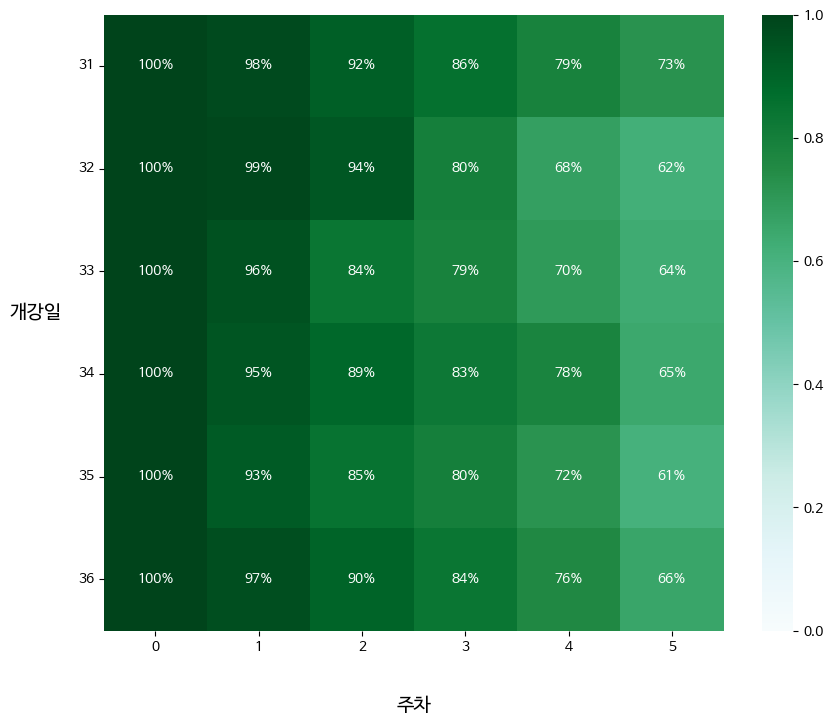

In [64]:
#히트맵으로 시각화하기
import seaborn as sns

plt.figure(figsize=(10,8))

sns.heatmap(data=retention,
           annot=True, #각 cell의 데이터 표기 유무를 나타냅니다!
           fmt='.0%', #values(데이터의 값) 값의 소수점 표기
           vmin=0,#최소값 설정
           vmax=1,#최댓값 설정
           cmap="BuGn" #히트맵의 색을 설정합니다
						)


plt.xlabel('주차', fontsize=14,labelpad=30)

plt.ylabel('개강일', fontsize=14,rotation=360,labelpad=30)
plt.yticks(rotation=360)

plt.show()

가설 보고서

"지난 8월 둘째 주부터 시행한 3주차 커리큘럼 변경 건이
수강 완주율에 어떤 영향을주었는가"에 대한 데이터 분석을 진행해보았는데
바꾸었던 3주차 전환을 나타내는 4주 차 컬럼에서만 떨어진 것이 아니라 전체적으로 떨어진 것을 볼 수 있다

추가적으로 4주 차 칼럼이 일정하게 떨어져서 유지되고 있지도 않다
그러므로 다른 요인 때문에 완주율이 떨어졌다고 보는 것이 맞을 것 같다